# # Introduction

Instacart is a grocery delivery platform where customers can place an order and have it delivered, similar to Uber Eats and DoorDash.
The dataset we've provided has been modified from the original. We reduced the dataset size to make your calculations faster and introduced missing and duplicate values. We were careful to preserve the distributions of the original data when we made the changes.

You must complete three steps. For each step, write a brief introduction that clearly reflects how you intend to solve each step, and write explanatory paragraphs that justify your decisions as you elaborate on your solution. Also write a conclusion that summarizes your findings and choices.


## Data Dictionary

There are five tables in the dataset, and you'll need to use all of them for data preprocessing and exploratory data analysis. Below is a data dictionary that lists the columns in each table and describes the data they contain.

- `instacart_orders.csv`: Each row corresponds to an order in the Instacart app.
    - `'order_id'`: An ID number that uniquely identifies each order.
    - `'user_id'`: An ID number that uniquely identifies each customer's account.
    - `'order_number'`: The number of times this customer has placed an order.
    - `'order_dow'`: The day of the week the order was placed (0 if Sunday).
    - `'order_hour_of_day'`: The hour of the day the order was placed.
    - `'days_since_prior_order'`: The number of days since this customer placed their previous order.
- `products.csv`: Each row corresponds to a unique product that customers can purchase.
    - `'product_id'`: ID number that uniquely identifies each product.
    - `'product_name'`: Name of the product.
    - `'aisle_id'`: ID number that uniquely identifies each grocery aisle category.
    - `'department_id'`: ID number that uniquely identifies each grocery department.
- `order_products.csv`: Each row corresponds to an item ordered in an order.
    - `'order_id'`: ID number that uniquely identifies each order.
    - `'product_id'`: ID number that uniquely identifies each product.
    - `'add_to_cart_order'`: The sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: ID number that uniquely identifies each grocery aisle category.
    - `'aisle'`: Aisle name.
- `departments.csv`
    - `'department_id'`: ID number that uniquely identifies each grocery department.
    - `'department'`: Department name.

#### Exploratory Data Analysis & Key Insights
**Dataset:** aisles.csv, departments.csv, instacart_orders.csv, order_products.csv, products.csv   
**Author:** Luis Sergio Pastrana Lemus   
**Date:** 2025-05-04

#### 🎯 Objective

Analyze the purchasing behavior of Instacart users to identify repurchase patterns, order frequency, and key products in the purchasing process.

Main questions:

> Which days and times have the most order activity?

> How often do users typically place orders?

> How many items do they typically purchase per order?

> Which products have the highest repurchase rate?

> Which products are typically added to the cart first, and how relevant are they?

> Is there a relationship between the order in which a product is added to the cart and the likelihood of it being reordered?

> How frequent is repurchase among different user segments?

# Step 1. Data Description

Read the data files (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv`, and `/datasets/order_products.csv`) with `pd.read_csv()` using the appropriate parameters to read the data correctly. Verify the information for each DataFrame created.


## Solution Plan
###### _LSPL_
1. Open and visually inspect the CSV files to get a general idea, including whether they have a CSV separator, column names, and column name formats. They are consistent in the number of columns and their titles, as well as recognition of empty values, unusual characters, numeric values ​​such as strings, special characters, etc.
2. General review of the dataset, verifying the size, columns, and data types (int, float, string, datetime, etc.). Verify that the number of rows makes sense compared to what is expected.
3. Create DataFrames from the CSV files.
4. Review the dataframe information, including composition (size), number of null values, and dtypes.
5. Document each step and record the transformations performed. This helps maintain traceability and reproducibility.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Relative Paths to .csv Files
aisles_path = '../data/raw/datasets/aisles.csv'
departments_path = '../data/raw/datasets/departments.csv'
instacart_orders_path = '../data/raw/datasets/instacart_orders.csv'
order_products_path = '../data/raw/datasets/order_products.csv'
products_path = '../data/raw/datasets/products.csv'

# Function that styles the display of DataFrames in Jupyter Notebook.
def zebra_rows(row):
    
    if row.name % 2 == 0:
        return ['background-color: #808080'] * len(row)  # 50% grey
    else:
        return ['background-color: #595959'] * len(row)  # 35% grey

# Function to display unique values ​​from the columns of a DataFrame
def columns_unique_values(df):
    
    for col in df.columns:
        print(f"Columna: {col}")
        print(f"Unique values: {df[col].unique()} Total unique values: {df[col].nunique()}")
        print("-" * 50, '\n')

# Function for assigning <NA> value to null values ​​in a DataFrame
def null_value_apply(df):
    
    null_values = ['', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None]
    
    for col in df.columns:
        
        df[col] = df[col].replace(null_values, pd.NA)
                
    return df

# Function for standardizing String values ​​(snake_case, lower, strip, hyphen removal)
def string_std(df):
        
    for col in df.columns:
            
        if df[col].dtype == 'object':
                
            df[col] = df[col].str.replace('-', '_').str.replace(' ', '_').str.lower().str.strip()
                
    return df

pd.set_option('display.max_rows', 25) # Display maximum 25 rows
pd.set_option('display.max_columns', 25) # Display maximum 10 columns
pd.set_option('display.max_colwidth', 15) # show maximum 50 characters in each column
pd.set_option('display.width', 150) # Display up to 150 characters

In [4]:
# Reading datasets into DataFrames
df_aisles = pd.read_csv(aisles_path, sep=';', header='infer', keep_default_na=False)
df_departments = pd.read_csv(departments_path, sep=';', header='infer', keep_default_na=False)
df_instacart_orders = pd.read_csv(instacart_orders_path, sep=';', header='infer', keep_default_na=False)
df_order_products = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=False)
df_products = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=False)

##### __Note__
###### _LSPL_

`header='infer'` was used because a visual inspection of the CSV files identified that the files had column names in the first row position.
`keep_default_na=False` was used because we plan to later identify and modify null values ​​and replace them with the null value `pd.NA`, since it handles mixed data types and common operations for identifying and eliminating null values, and also works with strings, integers, and Booleans.

##### __Infromacion de los DataFrames__

In [5]:
# Display DataFrame information
print("*** Aisles DataFrame: \n")
df_aisles.info()
print('*' * 50, '\n')
print("*** Departments DataFrame:\n")
df_departments.info()
print('*' * 50, '\n')
print("*** Instacart Orders DataFrame:\n")
df_instacart_orders.info()
print('*' * 50, '\n')
print("*** Order Products DataFrame:\n")
df_order_products.info()
print('*' * 50, '\n')
print("*** Products DataFrame:\n")
df_products.info()
print('*' * 50, '\n')


*** Aisles DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
************************************************** 

*** Departments DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
************************************************** 

*** Instacart Orders DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------

##### __Note__
###### _LSPL_
No processing is required for column names since they are standardized, with lowercase letters, using underscores to separate compound names (snake_case), and do not have spaces at the beginning or end of each column name.

## Conclusions
###### _LSPL_
The format and values ​​of the column names do not require modification.

For cleaning or preprocessing DataFrame values, the following will be required:

- Standardization of the format to snake_case, considering spaces and hyphens between compound strings.
- Processing of NULL values
- Elimination of duplicate values
- Processing of string values ​​to numeric values

Most of the DataFrame values ​​can be considered moderately correct, without much difficulty in preprocessing them.


#### 🔍Dataset Overview

- **Source:** aisles.csv
- **Rows:** 134 records
- **Columns:** aisle_id, aisle
---------------------------------------
- **Source:** departments.csv
- **Rows:** 21 records
- **Columns:** department_id, department
---------------------------------------
- **Source:** instacart_orders.csv
- **Rows:** 478967 records
- **Columns:** order_id, user_id, order_number, order_dow, order_hour_of_day, day_since_prior_order
---------------------------------------
- **Source:** order_products.csv
- **Rows:** 134 records
- **Columns:** order_id, product_id, add_to_cart_order, reordered
---------------------------------------
- **Source:** products.csv
- **Rows:** 49,694 records
- **Columns:** product_id, product_name, aise_id, department_id
---------------------------------------
Initial checks:
- Missing values
- Explicit duplicates
- Normalization to snake_case format

# Step 2. Data Preprocessing

Preprocess the data as follows:

- Check and correct the data types (for example, make sure the ID columns are integers).
- Identify and complete missing values.
- Identify and remove duplicate values.

Be sure to explain what types of missing and duplicate values ​​you found, how you completed or removed them, and why you used those methods. Why do you think these missing and duplicate values ​​may have been present in the dataset?

## Solution Plan
###### _LSPL_
1. Missing Value Handling: Identify null values ​​('', ' ', '-', NaN, None, empty cells).

2. Analysis and Decision Making: Eliminate rows or columns with many missing values. Replace (with mean, median, zeros, etc.). Keep if meaningful.

3. Duplicate Detection: Eliminate duplicate rows with explicit duplicates. Review and correct for implicit duplicates (typos).

4. Format Consistency: Ensure date values ​​are in the same format. Standardize categories that are spelled differently (e.g., "Female," "Female," "Woman" → "F"). Convert data to the correct types (str, datetime, int, etc.).

5. Encoding and special character verification: Check for rare characters and hidden spaces.

6. Documentation of each step: Record of transformations performed. This helps maintain traceability and reproducibility.

## Find and remove duplicate values ​​(and describe how you made your decisions).

### `instacart orders` data frame

In [6]:
# Check for duplicate orders
print("*** DataFrame [Instacart Orders], number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_instacart_orders.duplicated().sum()}")
print()
print("DataFrame [Instacart Orders], explicit duplicate values: \n")
df_view = df_instacart_orders.loc[df_instacart_orders.duplicated()] # keep=False # Show all duplicates, not just unique duplicates
display(df_view.style.apply(zebra_rows, axis=1))



*** DataFrame [Instacart Orders], number of explicit duplicate values: 

Explicit duplicates: 15

DataFrame [Instacart Orders], explicit duplicate values: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,


Do you have duplicate rows? If so, what do they have in common?
###### _LSPL_
There are 15 duplicate rows, which are explicit duplicates (the row values ​​for all columns are the same as the other rows).
These are orders placed on the 3rd at 2 a.m.

In [7]:
# Based on your findings,
# Check all orders placed on Wednesday at 2:00 a.m.

print("*** DataFrame [Instacart Orders], orders placed on the 3rd at 2 am: \n")
df_view = df_instacart_orders.loc[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))
print(f"Total number of rows (orders for day 3 at 2 am): {((df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)).shape[0]}")


*** DataFrame [Instacart Orders], orders placed on the 3rd at 2 am: 



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
400167,774488,66195,16,3,2,2.0
200059,1782114,106752,1,3,2,
313544,2425457,152040,9,3,2,2.0
459635,1680532,106435,6,3,2,21.0
311713,1021560,53767,3,3,2,9.0
119251,408114,68324,4,3,2,18.0
18420,382357,120200,19,3,2,11.0
244432,1395560,166923,6,3,2,5.0
321100,408114,68324,4,3,2,18.0
458816,910166,164782,18,3,2,4.0


Total number of rows (orders for day 3 at 2 am): 478967


What does this result suggest?

In [8]:
# Eliminate explicit duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [9]:
# Recheck for duplicate rows
print("*** DataFrame [Instacart Orders], number of explicit duplicate values ​​after explicit duplicate removal: \n")
print(f"Current explicit duplicates: {df_instacart_orders.duplicated().sum()}")

*** DataFrame [Instacart Orders], number of explicit duplicate values ​​after explicit duplicate removal: 

Current explicit duplicates: 0


In [10]:
# Recheck only for duplicate order IDs
print("*** DataFrame [Instacart Orders], column 'order_id', number of explicit duplicate values:\n")
print(f"Explicit duplicates: {df_instacart_orders['order_id'].duplicated().sum()}")

*** DataFrame [Instacart Orders], column 'order_id', number of explicit duplicate values:

Explicit duplicates: 0


Briefly describe your findings and what you did with them.
###### _LSPL_
From 478,967 orders placed on the 3rd at 2 a.m., 15 explicitly duplicate rows were found, which were removed.

### `products` data frame

In [11]:
# Check for fully duplicated rows
print("*** DataFrame [Products], number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_products.duplicated().sum()}")

*** DataFrame [Products], number of explicit duplicate values: 

Explicit duplicates: 0


In [12]:
# Check only for duplicate department IDs
print("*** DataFrame [Products], column 'department_id', number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_products['department_id'].duplicated().sum()}")
print(f"Unique values: {df_products['department_id'].unique()}, Total unique values: {df_products['department_id'].nunique()}")


*** DataFrame [Products], column 'department_id', number of explicit duplicate values: 

Explicit duplicates: 49673
Unique values: [19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10], Total unique values: 21


In [13]:
# Check only for duplicate product names (convert names to uppercase for better comparison)
print("*** DataFrame [Products], column 'product_name', number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_products['product_name'].str.upper().duplicated().sum()}")
print(f"Unique values: {df_products['product_name'].str.upper().unique()}, Total unique values: {df_products['product_name'].str.upper().nunique()}")

*** DataFrame [Products], column 'product_name', number of explicit duplicate values: 

Explicit duplicates: 1361
Unique values: ['CHOCOLATE SANDWICH COOKIES' 'ALL-SEASONS SALT'
 'ROBUST GOLDEN UNSWEETENED OOLONG TEA' ... 'ARTISAN BAGUETTE'
 'SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD' 'FRESH FOAMING CLEANSER'], Total unique values: 48333


In [18]:
# Check for duplicate non-missing product names
df_products_missing = pd.read_csv(products_path, sep=';', header='infer', keep_default_na=True)
df_products_missing['product_name'] = df_products_missing['product_name'].fillna('MISSING')

mask1 = df_products_missing['product_name'] != "MISSING"
mask2 = df_products_missing['product_name'] == "MISSING"
print("*** DataFrame [Products], column 'product_name', explicit duplicate values ​​with no missing values ​​\n")
print(f"Explicit duplicates (No missing values): {df_products_missing.loc[mask1, 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')
print("DataFrame [Products], column 'product_name', duplicate values explicit with missing values ​​\n")
print(f"Explicit duplicates (With missing values): {df_products_missing.loc[mask2, 'product_name'].duplicated().sum()}")
print('*' * 50, '\n')



*** DataFrame [Products], column 'product_name', explicit duplicate values ​​with no missing values ​​

Explicit duplicates (No missing values): 0
************************************************** 

DataFrame [Products], column 'product_name', duplicate values explicit with missing values ​​

Explicit duplicates (With missing values): 1257
************************************************** 



Briefly describe your findings and what you did with them.
###### _LSPL_
The products DataFrame has no explicit duplicate values; however, it has several missing values ​​in the 'product_name' column.
These will not be removed since they are only explicit duplicate values ​​in the 'product_name' column; they will be processed later as missing values.

### `departments` data frame

In [19]:
# Check for fully duplicated rows
print("*** DataFrame [Departments], number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_departments.duplicated().sum()}")

*** DataFrame [Departments], number of explicit duplicate values: 

Explicit duplicates: 0


In [20]:
# Check only for duplicate department IDs
print("*** DataFrame [Departments], column 'department_id', number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_departments['department_id'].duplicated().sum()}")


*** DataFrame [Departments], column 'department_id', number of explicit duplicate values: 

Explicit duplicates: 0


Briefly describe your findings and what you did with them.
###### _LSPL_
The departments DataFrame has no explicit duplicate values.

### `aisles` data frame

In [21]:
# Check for fully duplicated rows
print("*** DataFrame [Aisles], number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_aisles.duplicated().sum()}")

*** DataFrame [Aisles], number of explicit duplicate values: 

Explicit duplicates: 0


In [22]:
# Check only for duplicate aisle IDs
print("*** DataFrame [Aisles], column 'aisle_id' number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_aisles['aisle_id'].duplicated().sum()}")

*** DataFrame [Aisles], column 'aisle_id' number of explicit duplicate values: 

Explicit duplicates: 0


Briefly describe your findings and what you did with them.
###### _LSPL_
The aisles DataFrame has no explicit duplicate values.

### `order_products` data frame

In [23]:
# Check for fully duplicated rows
print("*** DataFrame [Order products], number of explicit duplicate values: \n")
print(f"Explicit duplicates: {df_order_products.duplicated().sum()}")

*** DataFrame [Order products], number of explicit duplicate values: 

Explicit duplicates: 0


In [25]:
# Check again for any other misleading duplicates
df_order_products_missing = pd.read_csv(order_products_path, sep=';', header='infer', keep_default_na=True)
df_order_products_missing['add_to_cart_order'] = df_order_products_missing['add_to_cart_order'].fillna('MISSING')

mask1 = df_order_products_missing['add_to_cart_order'] != "MISSING"
mask2 = df_order_products_missing['add_to_cart_order'] == "MISSING"
print("*** DataFrame [Order products], column 'add_to_cart_order', number of explicit duplicate values ​​without missing values: \n")
print(f"Duplicates (No missing values): {df_order_products_missing.loc[mask1, 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')
print("*** DataFrame [Order products], column 'add_to_cart_order', number of explicit duplicate values ​​with missing values: \n")
print(f"Duplicates (With missing values): {df_order_products_missing.loc[mask2, 'add_to_cart_order'].duplicated().sum()}")
print('*' * 50, '\n')

*** DataFrame [Order products], column 'add_to_cart_order', number of explicit duplicate values ​​without missing values: 

Duplicates (No missing values): 4544107
************************************************** 

*** DataFrame [Order products], column 'add_to_cart_order', number of explicit duplicate values ​​with missing values: 

Duplicates (With missing values): 835
************************************************** 



Briefly describe your findings and what you did with them.
###### _LSPL_
The order_products DataFrame has explicit, non-absent duplicate values ​​in the 'add_to_cart_order' column and several missing values ​​in the 'add_to_cart_order' column. Duplicate values ​​are expected for the 'add_to_cart_order' and 'reorder_id' columns, since each order in these two columns can have repeating values. These values ​​represent the order order of each product and whether or not it has been reordered, with unique values ​​('0' or '1'). These values ​​will not be removed, since they are only explicit duplicate values ​​in the 'add_to_cart_order' column. Missing values ​​will be processed later.

## Find and remove missing values

When working with duplicate values, we noticed that we also need to investigate missing values:

* The `'product_name'` column in the products table.
* The `'days_since_prior_order'` column in the orders table.
* The `'add_to_cart_order'` column in the order_productos table.

##### __Note__
###### _LSPL_
Since _df = pd.read_csv('path', sep=';', header='infer', `keep_default_na=False`)_ is used, the _NA_ values ​​that are detected by default by pandas are kept as the original text within the DataFrame, so that they can later be processed as `pd.NA`. Since `pd.NA` handles mixed data types and common operations for identifying and eliminating null values, it also works with strings, integers, and booleans.

In [26]:
# Display DataFrame information for possible null values ​​('', ' ', '-', 'N/A', 'NA', 'NaN', 'nan', 'NULL', 'null', 'None', None)

print("*** DataFrame [Aisles], missing values ​​per column: \n")
columns_unique_values(df_aisles)
print()
print("*** DataFrame [Departments], missing values ​​per column: \n")
columns_unique_values(df_departments)
print()
print("*** DataFrame [Instacart Orders], missing values ​​per column: \n")
columns_unique_values(df_instacart_orders)
print()
print("*** DataFrame [Order Products], missing values ​​per column: \n")
columns_unique_values(df_order_products)
print()
print("*** DataFrame [Products], missing values ​​per column: \n")
columns_unique_values(df_products)

*** DataFrame [Aisles], missing values ​​per column: 

Columna: aisle_id
Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134] Total unique values: 134
-------------------------------------------------- 

Columna: aisle
Unique values: ['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alternat

In [27]:
# Identifying and Correcting Null Values ​​in pd.NA

# Call the 'def null_value_apply(df)' function to replace missing values ​​with pd.NA.
null_value_apply(df_aisles)
null_value_apply(df_departments)
null_value_apply(df_instacart_orders)
null_value_apply(df_order_products)
null_value_apply(df_products)

# Display the number of missing values ​​in pd:NA format
print("*** DataFrame [Aisle], number of missing values ​​<NA>: \n", df_aisles.isna().sum())
print('*' * 50, '\n')
print("DataFrame [Departments], number of missing values ​​<NA>: \n", df_departments.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Instacart orders], number of missing values ​​<NA>:\n", df_instacart_orders.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Order products], number of missing values ​​<NA>: \n", df_order_products.isna().sum())
print('*' * 50, '\n')
print("Data Frame [Products], number of missing values ​​<NA>: \n", df_products.isna().sum())
print('*' * 50, '\n')
print("\n\n")

print("*** Data Frame [Instacart Orders], missing values ​​properly identified as <NA>: \n")
#Call the function 'def columns_unique_values(df)' to display the unique values ​​of the DataFrame columns
columns_unique_values(df_instacart_orders)
print("Data Frame [Instacart orders], number of missing values: \n", df_instacart_orders. isna(). sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Order Products], missing values ​​properly identified as <NA>: \n")
# Call the 'def columns_unique_values(df)' function to display the unique values ​​of the DataFrame columns
columns_unique_values(df_order_products)
print()
print("Data Frame [Order Products], number of missing values: \n", df_order_products. isna(). sum())
print('*' * 50, '\n')
print()

print("*** DataFrame [Products], missing values ​​properly identified as <NA>:: \n")
# Call the 'def columns_unique_values(df)' function to display the unique values ​​of the DataFrame columns.
columns_unique_values(df_products)
print("DataFrame [Products], number of missing values: \n", df_products.isna().sum())
print('*' * 50, '\n')


*** DataFrame [Aisle], number of missing values ​​<NA>: 
 aisle_id    0
aisle       0
dtype: int64
************************************************** 

DataFrame [Departments], number of missing values ​​<NA>: 
 department_id    0
department       0
dtype: int64
************************************************** 

Data Frame [Instacart orders], number of missing values ​​<NA>:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
************************************************** 

Data Frame [Order products], number of missing values ​​<NA>: 
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
************************************************** 

Data Frame [Products], number of missing values ​​<NA>: 
 product_id          0
product_name     1258
aisle_id            0
departm

##### __Note__
###### _LSPL_
Missing values ​​in:

Data Frame [Instacart orders], column 'days_since_prior_order'

Data Frame [Order products], column 'add_to_cart_order'

Data Frame [Products], column 'product_name'


### `products` data frame

In [28]:
# Find missing values ​​in column 'product_name'
print("*** DataFrame [Products], column 'product_name', missing values ​​duly identified as <NA>: ")
print(df_products['product_name'].value_counts(dropna=False))
print()
df_view = df_products.loc[df_products['product_name'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Products], column 'product_name', missing values ​​duly identified as <NA>: 
product_name
<NA>                                                                 1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64



,product_id,product_name,aisle_id,department_id
890,891,,100,21
47388,47389,,100,21
23854,23855,,100,21
25927,25928,,100,21
26227,26228,,100,21
17672,17673,,100,21
10270,10271,,100,21
24408,24409,,100,21
30342,30343,,100,21
16272,16273,,100,21


Briefly describe your findings.
###### _LSPL_
Based on the search for missing values ​​and the sampling of rows with missing values ​​in the DataFrame [Products], column 'product_name', we confirmed that there are 1258 missing values.

In [30]:
# Are all missing product names related to aisle ID 100?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("There are no rows with null values ​​in column 'aisle_id' other than 100")

There are no rows with null values ​​in column 'aisle_id' other than 100


Briefly describe your findings.
###### _LSPL_
Based on the search for missing values ​​and the sampling of rows with missing values ​​in the DataFrame [Products], column 'product_name', we confirmed that there are no missing values ​​outside of aisle 100.

In [31]:
# Are all missing product names related to department ID 21?
df_view = df_products.loc[(df_products['product_name'].isna()) & (df_products['department_id'] != 21), :]

if len(df_view) != 0:
    print(df_view.sample(25).style.apply(zebra_rows, axis=1))
else:
    print("There are no rows with null values ​​in column 'department_id' other than 21")

There are no rows with null values ​​in column 'department_id' other than 21


Briefly describe your findings.
###### _LSPL_
Based on the search for missing values ​​and the sampling of rows with missing values ​​in the [Products] DataFrame, column 'productname', we confirmed that there are no missing values ​​outside of department 21.

In [ ]:
# Use the department and aisle tables to review the data for aisle ID 100 and department ID 21.
# LSPL
# It was previously displayed in the resulting view from the boolean indexing df_products['product_name'].isna()

Briefly describe your findings.
###### _LSPL_
It appears that Instacart_orders uses department_ID 21 and aisle 100 for products that don't have a name, even though they have a product ID. This could be confirmed with Instacart to determine if these products are relevant, if they could be identified in some way so the name could be corrected, and if those that cannot be identified could be removed. In the meantime, they will be identified with the value 'Unknown'.

In [32]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print("*** DataFrame [Products], column 'product_name' missing values ​​replaced with 'Unknown': ")
df_products['product_name'].value_counts(dropna=False)

*** DataFrame [Products], column 'product_name' missing values ​​replaced with 'Unknown': 


product_name
Unknown                                                              1258
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce       1
Green Chile Anytime Sauce                                               1
Porto                                                                   1
Small & Medium Dental Dog Treats                                        1
                                                                     ... 
HIGH PERFORMANCE ENERGY DRINK                                           1
ORIGINAL PANCAKE & WAFFLE MIX                                           1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                         1
SPRING WATER BODY WASH                                                  1
Robust Golden Unsweetened Oolong Tea                                    1
Name: count, Length: 48437, dtype: int64

Briefly describe your findings and what you did with them.
###### _LSPL_

1258 missing values ​​were found in the [Products] DataFrame, column 'product_name', which were replaced with 'Unknown'.

### `instacart orders` data frame

In [33]:
# Find missing values
print("*** DataFrame [Instacart orders], column 'days_since_prior_order' missing values ​​duly identified as <NA>: ")
print(df_instacart_orders['days_since_prior_order'].value_counts(dropna=False), "\n")
print("Missing values: ", df_instacart_orders['days_since_prior_order'].isna().sum())
print()
df_view = df_instacart_orders.loc[df_instacart_orders['days_since_prior_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Instacart orders], column 'days_since_prior_order' missing values ​​duly identified as <NA>: 
days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
        ...  
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, Length: 32, dtype: int64 

Missing values:  28817



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
100644,2204416,50853,1,0,15,
225460,954823,187350,1,2,9,
40340,1086941,191386,1,1,12,
275963,19289,191959,1,1,7,
115193,473471,166226,1,2,9,
62060,1582941,11231,1,0,22,
164636,214076,85705,1,2,12,
437720,2143747,111418,1,6,14,
5161,765671,181960,1,6,13,
376168,43869,62480,1,2,20,


In [36]:
# Are there any missing values ​​other than the customer's first order?

# Filter out orders that are not the first order
df_orders_wo_first_order = df_instacart_orders.loc[df_instacart_orders['order_number'] != 1, :]
# Check for missing values ​​in the 'days_since_prior_order' column
null_values = df_orders_wo_first_order['days_since_prior_order'].isna().any()
print("There are missing values ​​other than the first order: ", null_values)

There are missing values ​​other than the first order:  False


Briefly describe your findings and what you did with them.
###### _LSPL_
28,817 missing values ​​were identified in the 'days_since_prior_order' column. It was identified that the missing values ​​in this column occurred only during the first order number. The values ​​in the 'days_since_prior_order' column can have missing values ​​if it is the first order because the first order has no previous order, but they should not have missing values ​​if it is not the first order. Therefore, these missing values ​​are expected and should not be modified because they comply with business logic.

### `order_products` data frame

In [37]:
# Find missing values
print("*** DataFrame [Order products], column 'add_to_cart_order' missing values ​​properly identified as <NA>: ")
print(df_order_products['add_to_cart_order'].value_counts(dropna=False), "\n")
print("Missing values: ", df_order_products['add_to_cart_order'].isna().sum())
print()
df_view = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]
display(df_view.sample(25).style.apply(zebra_rows, axis=1))

*** DataFrame [Order products], column 'add_to_cart_order' missing values ​​properly identified as <NA>: 
add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: count, Length: 65, dtype: int64 

Missing values:  836



,order_id,product_id,add_to_cart_order,reordered
954728,903110,10305,,1
4431614,180546,1194,,0
3863361,171934,8088,,0
1420876,2094761,47862,,0
381535,61355,12315,,0
1044012,61355,45599,,0
128360,2449164,14386,,0
3883178,1717990,26209,,1
618153,2721963,27900,,0
642353,1673227,21230,,0


In [39]:
# What are the minimum and maximum values ​​in this column?
print("*** DataFrame [Order products], column 'add_to_cart_order', minimum and maximum values: \n")
print(pd. to_numeric(df_order_products['add_to_cart_order'], errors='coerce'). astype('Float64'). describe(include='all'))

print()

for column in df_order_products:
    
    if column != 'add_to_cart_order':
        print(f"Minimum value for column {column}: {df_order_products[column]. min()}, Maximum value for column {column}: {df_order_products[column]. max()}")

*** DataFrame [Order products], column 'add_to_cart_order', minimum and maximum values: 

count    4544171.0
mean      8.351669
std       7.080368
min            1.0
25%            3.0
50%            6.0
75%           11.0
max           64.0
Name: add_to_cart_order, dtype: Float64

Minimum value for column order_id: 4, Maximum value for column order_id: 3421079
Minimum value for column product_id: 1, Maximum value for column product_id: 49694
Minimum value for column reordered: 0, Maximum value for column reordered: 1


Briefly describe your findings.
###### _LSPL_

836 missing values ​​were found in the [Order products] DataFrame, column 'add_to_cart_order'; the minimum values ​​for the columns correspond to the business logic.

In [40]:
# Save all order IDs that have a missing value in 'add_to_cart_order'
missing_ordr_ids = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'order_id'].unique()
print(missing_ordr_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [41]:
# Do all orders with missing values ​​have more than 64 products?
df_op_na = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]

print("Do all orders with missing values ​​have more than 64 products?", (df_op_na.groupby('order_id')['product_id'].count() > 64).all())
print()

# Group all orders with missing data by their order ID.
df_oid_na = df_op_na.groupby('order_id')

# Count the number of 'product_id's' in each order and check the minimum count.
print("Product quantities in each order with missing values ​​in column 'add_to_cart_order': \n", df_oid_na['product_id'].count())
print("Minimum value of products in each order with missing values ​​in column 'add_to_cart_order': ", df_oid_na['product_id'].count().min())

Do all orders with missing values ​​have more than 64 products? False

Product quantities in each order with missing values ​​in column 'add_to_cart_order': 
 order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
Minimum value of products in each order with missing values ​​in column 'add_to_cart_order':  1


Briefly describe your findings.
###### _LSPL_
I can't find any direct business logic between these columns based solely on the information analyzed. Missing values ​​in the 'add_to_cart_order' column could mean that the data wasn't captured correctly, the order was generated differently (automatic reordering), or there was a system error.

In [42]:
# Replace missing values ​​in column 'add_to_cart? with 999 and converts the column to integer type.
df_order_products['add_to_cart_order'] = pd.to_numeric(df_order_products['add_to_cart_order'], errors='coerce').fillna(999).astype('int64')
print("*** DataFrame [Order products], column 'add_to_cart_order' data type: ", df_order_products['add_to_cart_order'].dtypes)
print()
print("DataFrame [Order products], column 'add_to_cart_order' unique values: \n", df_order_products['add_to_cart_order'].unique())

*** DataFrame [Order products], column 'add_to_cart_order' data type:  int64

DataFrame [Order products], column 'add_to_cart_order' unique values: 
 [ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]


Briefly describe your findings and what you did with them.
###### _LSPL_
836 missing values ​​were identified in the 'add_to_cart_order' column. The number of products with missing values ​​is not directly related to the number of products and the absence of missing values ​​in 'add_to_cart_order'. Whether there are many or few products does not depend on whether 'add_to_cart_order' contains missing values ​​or not. Other external variables could be missing: how was the order placed? By app? By web? By automatic reorder? By assistance?

##### __Note__
###### _LSPL_
Additionally, I'd like to correct the following:

Strings with spaces were found in compound names. Please standardize the format to snake_case.
- DataFrame [Aisles] column 'aisle'
- DataFrame [Departments] column 'departmen'

Quantitative values ​​were found as categorical values. Please convert them to numeric values.
- DataFrame [Instacart orders] column 'days_since_prior_order'

Strings with spaces and '-' were found in compound names. Please standardize the format to snake_case.
- DataFrame [Products] column 'product_name'


In [43]:
# Standardization of string value format for each column of the DataFrames that have dType 'object'
# The def string_std(df) function is called to process the string values ​​to apply formatting
df_aisles = string_std(df_aisles)
df_departments = string_std(df_departments)
df_products = string_std(df_products)

display(df_aisles.sample(25).style.apply(zebra_rows, axis=1))
print()
display(df_departments.head(25).style.apply(zebra_rows, axis=1))
print()
display(df_products.sample(25).style.apply(zebra_rows, axis=1))

# Validate if DataFrame [instacart orders] column 'days_since_prior_order' contains numeric values ​​or object
print(f"DataFrame [Instacart orders] column 'days_since_prior_order' dtypes:\n {df_instacart_orders.dtypes}\n")
print(df_instacart_orders['days_since_prior_order'].unique())
print()
df_instacart_orders['days_since_prior_order'] = pd.to_numeric(df_instacart_orders['days_since_prior_order'], errors='coerce')
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna(0)
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype('int64')
print(df_instacart_orders['days_since_prior_order'].unique())


,aisle_id,aisle
127,128,tortillas_flat_bread
95,96,lunch_meat
90,91,soy_lactosefree
74,75,laundry
81,82,baby_accessories
40,41,cat_food_care
99,100,missing
1,2,specialty_cheeses
54,55,shave_needs
2,3,energy_granola_bars


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry_goods_pasta
9,10,bulk


,product_id,product_name,aisle_id,department_id
257,258,vegetable_pot_pie,38,1
13851,13852,organic_broccoli_crown,83,4
32028,32029,low_sodium_organic_medium_chili,59,15
29378,29379,strawberry_cream_cheese_fruit_dip,67,20
46861,46862,delicious_din_din_2_(6_months+)_variety_pack,92,18
23672,23673,lite_creamy_caesar_dressing,89,13
32641,32642,roasted_chicken_breast,96,20
22435,22436,light_vegetable_soup,69,15
34166,34167,all_natural_gluten_free_chicken_pot_pie,38,1
25657,25658,unknown,100,21


DataFrame [Instacart orders] column 'days_since_prior_order' dtypes:
 order_id                   int64
user_id                    int64
order_number               int64
order_dow                  int64
order_hour_of_day          int64
days_since_prior_order    object
dtype: object

['30.0' '9.0' '2.0' '10.0' '17.0' '15.0' '22.0' '4.0' '8.0' '3.0' '12.0'
 '11.0' '7.0' '1.0' '5.0' '6.0' '14.0' <NA> '20.0' '16.0' '24.0' '23.0'
 '27.0' '13.0' '0.0' '28.0' '21.0' '25.0' '19.0' '18.0' '29.0' '26.0']

[30  9  2 10 17 15 22  4  8  3 12 11  7  1  5  6 14  0 20 16 24 23 27 13
 28 21 25 19 18 29 26]


## Conclusions

Write your intermediate conclusions about Step 2 here: Data Preprocessing
###### _LSPL_
Data cleaning represents a critical stage in any data science or analytics project, as it establishes the foundation upon which all subsequent interpretations and decisions will be made. Managing missing values, ensuring the correct typing of quantitative and categorical data, and eliminating explicit and implicit duplicates are fundamental tasks that allow for building robust and reliable datasets.
An analysis based on dirty data generates erroneous results; an analysis based on clean data produces accurate, useful, and defensible conclusions.
The quality of the analysis is only as good as the quality of the data on which it is based.

#### 📊 Key exploratory insights

# Step 3. Data Analysis

Once the data is processed and ready, perform the following analysis:

# [A] Easy (all must be completed to pass)

1. Verify that the values ​​in the `'order_hour_of_day'` and `'order_dow'` columns in the orders table are reasonable (i.e., `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6).
2. Create a graph showing the number of people placing orders depending on the time of day.
3. Create a graph showing which day of the week people shop.
4. Create a graph showing the time people wait until they place their next order, and comment on the minimum and maximum values.

### [A1] Check that the values ​​are sensitive

In [44]:
print(f"Minimum value of DataFrame [Instacart orders], column 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].min()}")
print(f"Maximum value of DataFrame [Instacart orders], column 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].max()}")
print(f"Unique values ​​of DataFrame [Instacart orders], column 'order_hour_of_day': {df_instacart_orders['order_hour_of_day'].unique()}")
print()
print(f"Minimum value of DataFrame [Instacart orders], column 'order_dow': {df_instacart_orders['order_dow'].min()}")
print(f"Maximum value of DataFrame [Instacart orders], column 'order_dow': {df_instacart_orders['order_dow'].max()}")
print(f"Unique values ​​of DataFrame [Instacart orders], column 'order_dow': {df_instacart_orders['order_dow'].unique()}")

Minimum value of DataFrame [Instacart orders], column 'order_hour_of_day': 0
Maximum value of DataFrame [Instacart orders], column 'order_hour_of_day': 23
Unique values ​​of DataFrame [Instacart orders], column 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]

Minimum value of DataFrame [Instacart orders], column 'order_dow': 0
Maximum value of DataFrame [Instacart orders], column 'order_dow': 6
Unique values ​​of DataFrame [Instacart orders], column 'order_dow': [6 5 0 4 3 1 2]


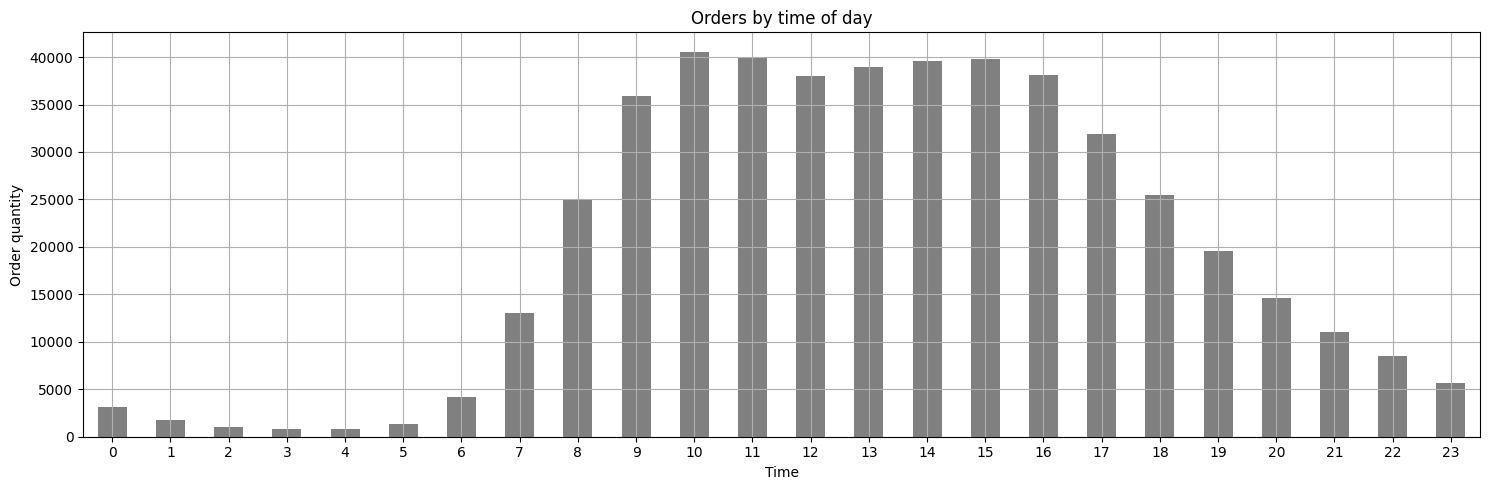

In [45]:
df_orders_by_hour = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
df_orders_by_hour.plot(kind='bar', 
                       title='Orders by time of day', 
                       xlabel="Time", 
                       ylabel="Order quantity", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='grey')
plt.tight_layout()
plt.show()

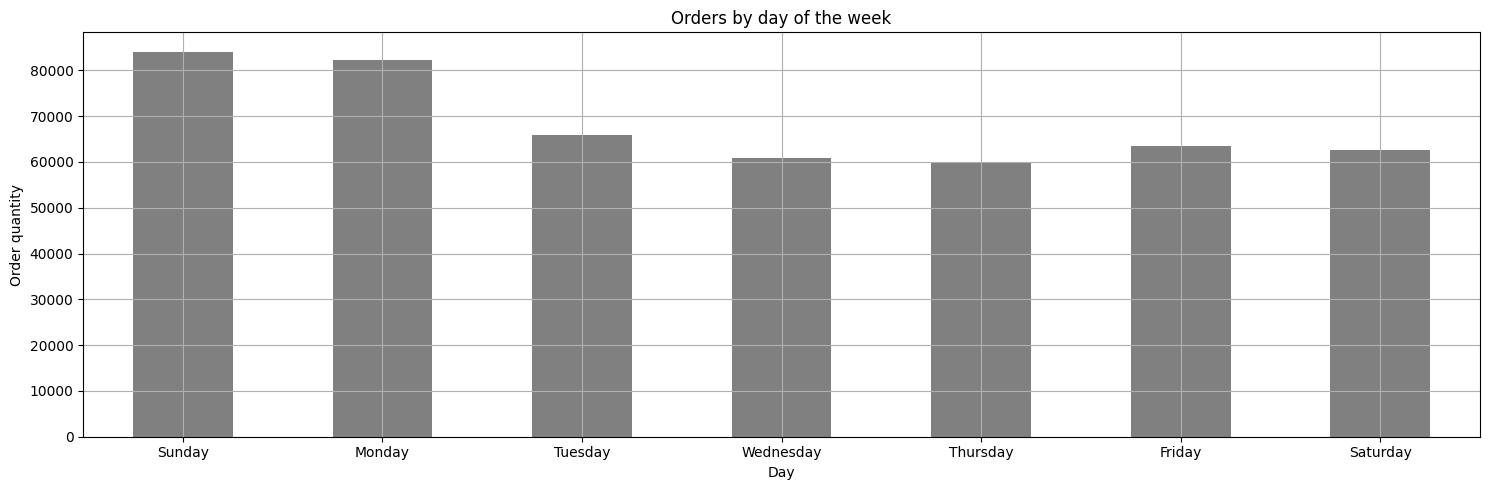

In [46]:
df_orders_by_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
df_orders_by_day.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_orders_by_day.plot(kind='bar', 
                       title='Orders by day of the week', 
                       xlabel="Day", 
                       ylabel="Order quantity", 
                       grid=True, 
                       rot=0, 
                       figsize=[15, 5], 
                       color='grey')
plt.tight_layout()
plt.show()

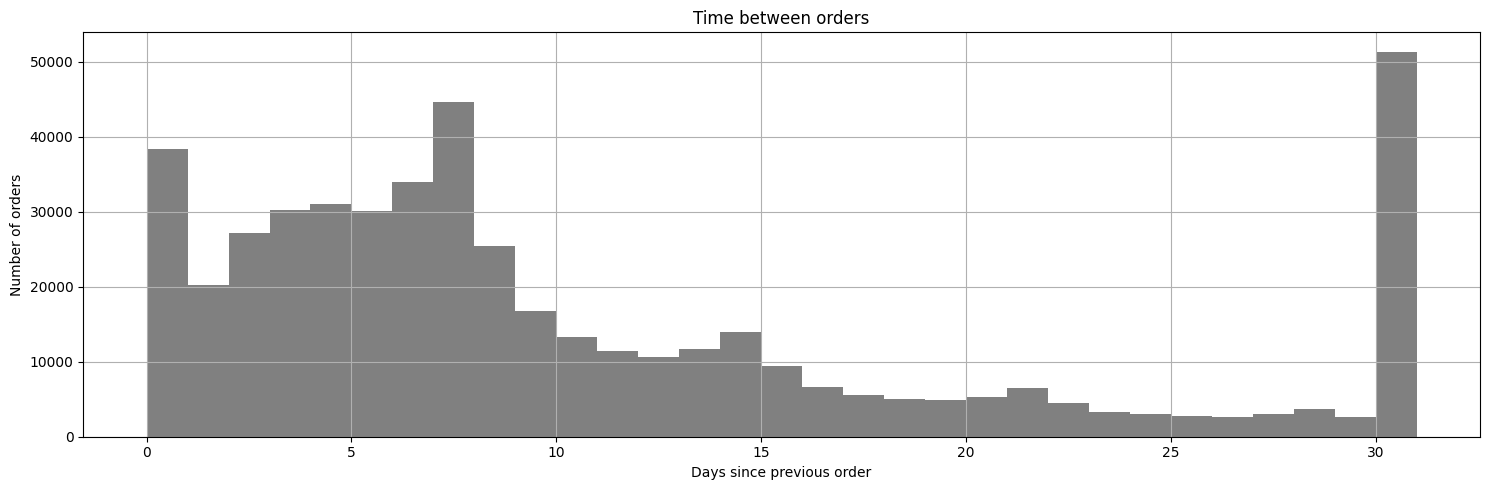

In [47]:

df_instacart_orders.hist(column='days_since_prior_order', 
                         bins=range(0, 32),
                         grid=True,
                         figsize=[15, 5], 
                         color='grey')
plt.title('Time between orders')
plt.xlabel('Days since previous order')
plt.ylabel('Number of orders')
plt.tight_layout()
plt.show()

Write your conclusions here
###### _LSPL_
- To create graphs showing the number of people who place orders depending on the time of day and day of the week they shop.
A vertical bar chart was chosen because it allows for identifying user behavior based on time or day.

In "Orders by Time of Day," the active hours where the most orders are generated are marked (7:00 AM to 9:00 PM) and the off-peak hours where the number of orders decreases (10:00 PM to 6:00 AM).

In "Orders by Day of the Week," it is shown that Sunday through Monday are when the highest number of orders are placed.

- To create graphs showing the time people wait until they place their next order, a histogram was chosen because it shows the frequency distribution, such as how many people waited 1 day, 2 days, 3 days, etc.

__Note__ for the days of the week chart, according to North American customs, the days of the week begin on Sundays, so the value 0 would be for Sunday.


### [A2] For each hour of the day, how many people place orders?

In [48]:
print(df_orders_by_hour)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


Write your conclusions here
###### _LSPL_

The time when most orders are generated is 10 am. From 7 am to 9 pm is the regular order generation time (over 10,000 orders). From 10 pm to 6 am is the time with the lowest sales due to people's off work (below 10,000 orders).

### [A3] Which day of the week do people buy groceries?

In [49]:
print(df_orders_by_day)
print()
print(f"The day of the week with the most orders: {df_orders_by_day.idxmax()}")

Sunday       84090
Monday       82185
Tuesday      65833
Wednesday    60897
Thursday     59810
Friday       63488
Saturday     62649
Name: order_id, dtype: int64

The day of the week with the most orders: Sunday


Write your conclusions here
###### LSPL

Sunday and Monday are the days with the highest order volume, likely a weekly purchasing pattern used to replenish groceries.

### [A4] How long do people wait before placing another order? Discuss the minimum and maximum values.

In [50]:
print(f"Minimum days to wait: {df_instacart_orders['days_since_prior_order'].min()}")
print(f"Maximum days to wait: {df_instacart_orders['days_since_prior_order'].max()}")

Minimum days to wait: 0
Maximum days to wait: 30


Write your conclusions here
###### _LSPL_
Minimum value: 0 days, generated by missing values, which indicates that they exist on days when users purchased that same day.

Maximum value: probably 30 days → many users schedule their orders monthly.

# [B] Intermediate (all must be completed to pass)

1. Is there any difference between the `'order_hour_of_day'` distributions for Wednesdays and Saturdays? Plot bar graphs of `'order_hour_of_day'` for both days in the same figure and describe any differences you observe.
2. Graph the distribution for the number of orders placed by customers (i.e., how many customers placed only one order, how many placed two, how many placed three, and so on).
3. What are the top 20 most frequently ordered products (show their ID and name)?

### [B1] Difference between Wednesdays and Saturdays for `'order_hour_of_day'`. Plot bar graphs for both days and describe any differences you see.

In [51]:
df_wnd_sat = df_instacart_orders[df_instacart_orders['order_dow'].isin([3, 6])]
display(df_wnd_sat.sample(25).style.apply(zebra_rows, axis=1))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
92584,1204935,21574,16,6,12,4
263748,3112703,69821,7,6,17,6
289535,1454717,176066,2,6,7,7
340847,1939857,34257,1,6,16,0
381303,2519713,45196,5,3,0,7
24665,975324,183844,42,3,9,1
307668,2994533,79213,34,3,16,3
399208,1149701,70126,11,3,19,6
245694,2549199,199027,9,6,11,13
420918,1535714,42213,7,6,11,6


In [52]:
# Filtrar solo miércoles y sábado
df_dy_hr = df_wnd_sat.pivot_table(index='order_hour_of_day',
                                  columns='order_dow',
                                  values='order_id',
                                  aggfunc='count')
display(df_dy_hr.head(25).style.apply(zebra_rows, axis=1))


order_dow,3,6
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


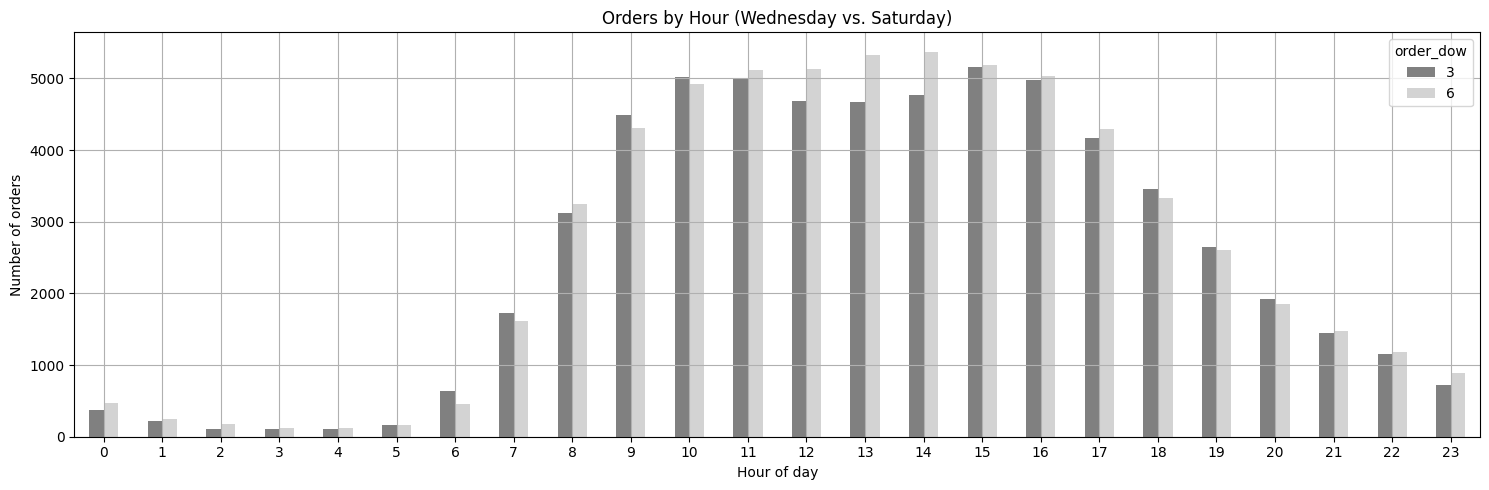

In [53]:
df_dy_hr.plot(kind='bar',
              title='Orders by Hour (Wednesday vs. Saturday)',
              xlabel='Hour of day',
              ylabel='Number of orders',
              grid=True,
              rot=0,
              figsize=[15, 5],
              color=['grey', 'lightgrey'])
plt.tight_layout()
plt.show()

Write your conclusions here
###### _LSPL_

There are certain differences in the distribution of orders by hour for Wednesdays and Saturdays.

Wednesday:

- The time when most orders are generated is 3 pm. From 7 am to 10 pm is the regular order generation time (over 10,000 orders). From 11 pm to 6 am is the time period with the lowest sales due to people's rest hours (below 10,000 orders). You can even see a drop in orders between 12 and 2 pm.

- The time when most orders are generated is 2 pm. From 7 am to 10 pm is the regular order generation time (over 10,000 orders). 11 p.m. to 6 a.m. is the period with the lowest sales due to people's off hours (below 10,000 orders). Saturdays don't see any drops in the number of orders during the day.

### [B2] What is the distribution for the number of orders per customer?

In [54]:
# Count how many orders each user has made
user_orders = df_instacart_orders['user_id'].value_counts()
print(f"Number of orders per user: \n {user_orders}")
print()

# Count how many users there are for each order quantity
user_per_amount_orders = user_orders.value_counts().sort_index()
print(f"Number of customers per order quantity: \n {user_per_amount_orders}")

Number of orders per user: 
 user_id
149605    28
193164    26
78375     25
134511    24
148162    24
          ..
73221      1
112002     1
82546      1
60017      1
133649     1
Name: count, Length: 157437, dtype: int64

Number of customers per order quantity: 
 count
1     55357
2     36508
3     21547
4     13498
5      8777
      ...  
23       19
24        3
25        1
26        1
28        1
Name: count, Length: 27, dtype: int64


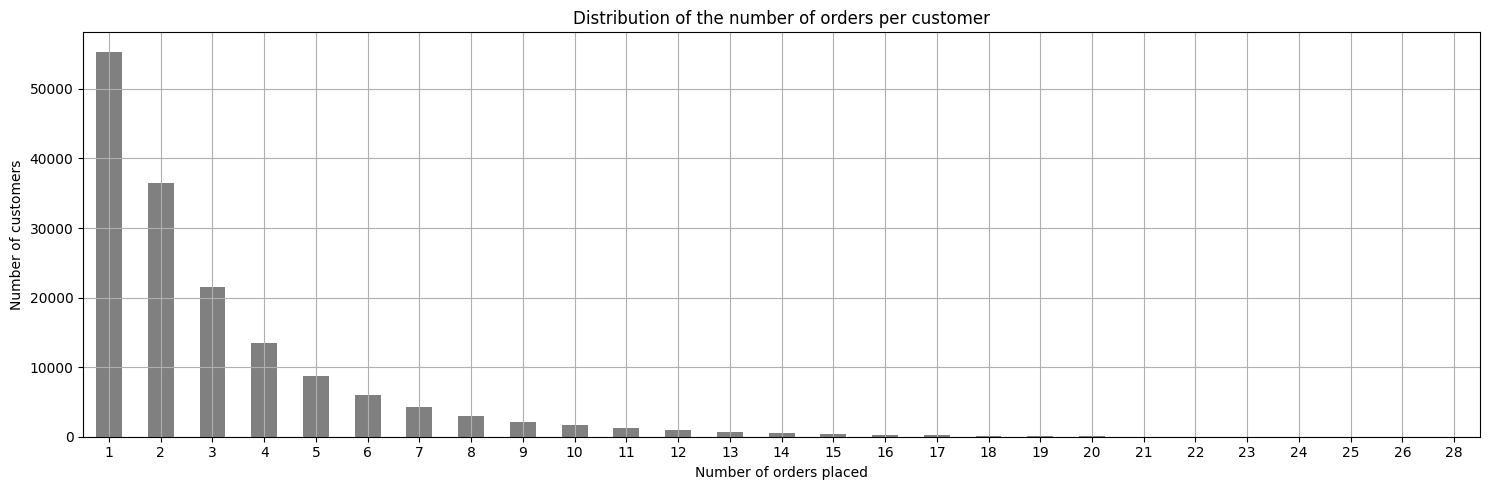

In [55]:
user_per_amount_orders.plot(
    kind='bar',
    title='Distribution of the number of orders per customer',
    xlabel='Number of orders placed',
    ylabel='Number of customers',
    grid=True,
    figsize=[15,5],
    rot=0,
    color='grey')
plt.tight_layout()
plt.show()

Write your conclusions here
###### _LSPL_
You can see the trend in the number of purchases made by most customers: many customers make one-time purchases or make few orders, and few customers make many orders.


### [B3] What are the 20 most popular products (show their ID and name)?

In [56]:
# Count how many times each product was ordered
df_most_ordered_products = df_order_products['product_id'].value_counts().reset_index()
df_most_ordered_products.columns = ['product_id', 'order_amounts']

display(df_most_ordered_products.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts
12803,6458,35
11196,1726,43
36398,30255,3
37703,40995,2
17844,4729,18
41441,47587,1
11824,3053,40
30678,38046,5
31675,13439,4
7690,17859,78


In [57]:
# Join with the products DataFrame to bring the name
df_top_prods = df_most_ordered_products.merge(df_products, on='product_id', how='left')

display(df_top_prods.sample(25).style.apply(zebra_rows, axis=1))

,product_id,order_amounts,product_name,aisle_id,department_id
6054,25773,110,#2_coffee_filters,26,7
5998,44828,112,ranch_dressing_&_dip,89,13
37427,15514,2,advantage_3_in_1_exfoliating_cleanser,73,11
12069,42263,38,blonde_ale,27,5
21627,41174,12,tea_variety_pack,94,7
24175,27524,9,diced_mangos_in_light_syrup,99,15
1257,23291,626,coconut_chia_bar,3,19
26761,30821,7,light_12_grain_bread,112,3
35181,9093,3,original_flavors_jelly_beans,45,19
13945,25307,30,tender_white_meat_turkey__pasta__mushrooms_and_celery_in_a_creamy_sauce_turkey_tetrazzini,38,1


In [58]:
df_top_twenty = df_top_prods[['product_id', 'product_name', 'order_amounts']]

display(df_top_twenty.head(20).style.apply(zebra_rows, axis=1))

,product_id,product_name,order_amounts
0,24852,banana,66050
1,13176,bag_of_organic_bananas,53297
2,21137,organic_strawberries,37039
3,21903,organic_baby_spinach,33971
4,47209,organic_hass_avocado,29773
5,47766,organic_avocado,24689
6,47626,large_lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic_whole_milk,19600


Write your conclusions here
###### LSPL
The top 20 products are shown, which could be classified as the most commonly used food items.

# [C] Difficult (all must be completed to pass)

1. How many items do people typically buy in one order? What is the distribution?
2. What are the top 20 items that are most frequently reordered (show their names and product IDs)?
3. For each product, what is the reorder rate (number of reorders/total orders)?
4. For each customer, what proportion of the products they ordered were previously ordered? Calculate the reorder rate for each user rather than for each product.
5. What are the top 20 items that people put first in their carts (show the product IDs, names, and the number of times they were the first item added to the cart)?

### [C1] How many items do people typically buy in one order? What's the distribution like?

In [59]:
items_per_order = df_order_products.groupby('order_id').size()

print("Number of items per order: \n",items_per_order.sample(25))


Number of items per order: 
 order_id
2898931     1
2359082    16
556027      2
3394614    31
2853462    35
1219786    24
3396418     9
154429      7
2842886     3
1728326     1
667584      8
3365050     1
2542219    32
3385010     6
1119371     3
2883675    12
2846366     8
1277361     3
3144399    45
2626091    24
1512970    23
1807619    31
1762162     7
2184480     1
2545192    19
dtype: int64


In [60]:
print("Item statistics per order: \n", items_per_order.describe())


Item statistics per order: 
 count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


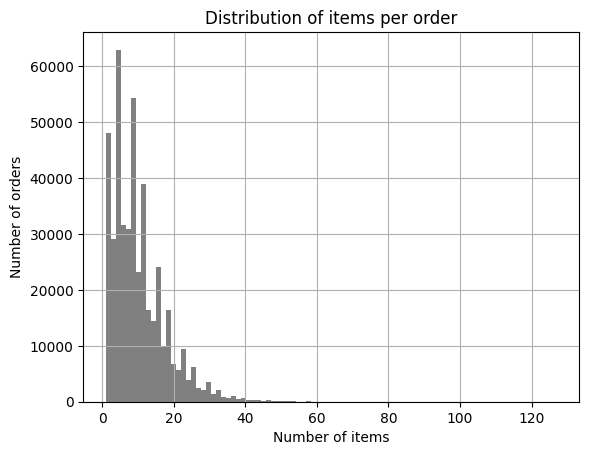

<Figure size 1500x500 with 0 Axes>

In [61]:
plt.hist(items_per_order, bins=90, color='grey')
plt.title('Distribution of items per order')
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
plt.grid(True)
plt.figure(figsize=(15, 5))
plt.tight_layout()
plt.show()

Write your conclusions here
###### LSPL

The minimum number of items per order is: 1   
The maximum number of items per order is: 127   
The average number of items per order is: 10 (The std is low, so the average measurement is reliable)   

The fewer items, the greater the number of orders; the more items, the fewer orders. (According to the normal purchasing trend)


### [C2] What are the top 20 most frequently reordered items (show their names and product IDs)?

In [62]:
df_reordered_products = df_order_products[df_order_products['reordered'] == 1]
display(df_reordered_products.sample(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
2833583,299530,43662,2,1
1828776,3390780,3389,12,1
3226166,1973992,22017,4,1
1527438,1638189,45416,24,1
1031362,3203320,13605,6,1
3170460,2628072,6000,4,1
3102294,2335413,41400,1,1
640922,1361960,31467,14,1
94072,596022,24013,4,1
844783,3046554,21497,6,1


In [63]:
df_top_20_ro = df_reordered_products['product_id'].value_counts().head(20)
print("Top 20 reordered products: ", df_top_20_ro)

Top 20 reordered products:  product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [64]:
# Cross IDs with names
df_top_20_names = df_top_20_ro.to_frame(name='reorder_count').merge(df_products[['product_id', 'product_name']],left_index=True,right_on='product_id').reset_index(drop=True)
df_top_20_names = df_top_20_names.sort_values(by='reorder_count', ascending=True)
print(df_top_20_names[['product_id', 'product_name', 'reorder_count']])

    product_id    product_name  reorder_count
19       49235  organic_hal...           8389
18        5876   organic_lemon           8412
17       39275  organic_blu...           8799
16        8277  apple_honey...           8836
15       28204  organic_fuj...           8989
14       49683  cucumber_kirby           9538
13       45007  organic_zuc...          10076
12       24964  organic_garlic          10411
11       22935  organic_yel...          11145
10       26209           limes          13327
9        16797    strawberries          13945
8        27966  organic_ras...          14748
7        47626     large_lemon          15044
6        27845  organic_who...          16251
5        47766  organic_avo...          18743
4        47209  organic_has...          23629
3        21903  organic_bab...          26233
2        21137  organic_str...          28639
1        13176  bag_of_orga...          44450
0        24852          banana          55763


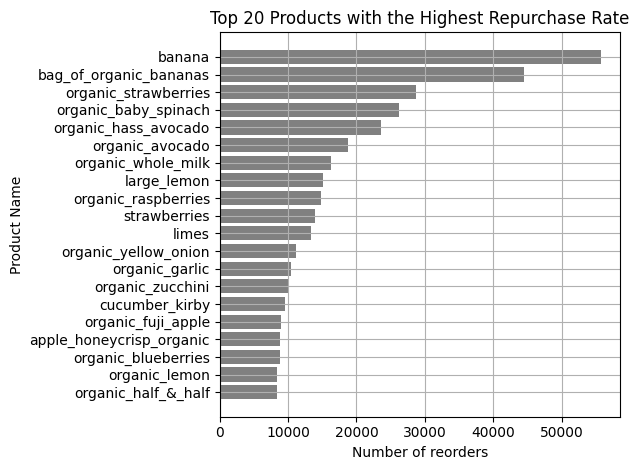

In [65]:
plt.barh(y=df_top_20_names['product_name'], width=df_top_20_names['reorder_count'], color='grey')
plt.xlabel('Number of reorders')
plt.ylabel('Product Name')
plt.title('Top 20 Products with the Highest Repurchase Rate')
plt.grid(True)
plt.Figure(figsize=(15,5))
plt.tight_layout()
plt.show()

Write your conclusions here
###### LSPL

To obtain the 20 products with the highest repurchase rates, information had to be obtained from several datasets, such as the DataFrame [order_products], column 'reordered', which contains information on repurchased products. From this same DataFrame, based on the 'product_id' column, a series was obtained with the total number of repurchases for the product. This series was merged with the DataFrame [products], columns 'product_id' and 'product_name', and then used in a horizontal bar chart to display the top 20 products with the highest purchase rates.

### [C3] For each product, what is the proportion of times it is ordered and what is the proportion of times it is reordered?

In [66]:
# Total orders by product
total_orders = df_order_products.groupby('product_id').size()
print("Total orders: \n", total_orders)

Total orders: 
 product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Length: 45573, dtype: int64


In [67]:
# Total repurchases by product
total_reorders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()
print("Total repurchases by product \n", total_reorders)

Total repurchases by product 
 product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Length: 36228, dtype: int64


In [68]:
# Reorder Rate
reorder_rate = (total_reorders / total_orders)
print()
# Product not listed in total_reorders, no value to divide
reorder_rate = (total_reorders / total_orders).fillna(0)
print()
print("Reorder Rate: \n", reorder_rate)
print()
# Assigning product_id as a column
reorder_rate = reorder_rate.reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']
print("Reorder Rate: \n", reorder_rate)
print()

# Cross-reference names
reorder_rate = reorder_rate.merge(df_products[['product_id', 'product_name']], on='product_id')
print("Reorder Rate: \n", reorder_rate.head(25).sort_values(by='reorder_rate', ascending=False))



Reorder Rate: 
 product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64

Reorder Rate: 
        product_id  reorder_rate
0               1      0.564286
1               2      0.000000
2               3      0.738095
3               4      0.510204
4               7      0.500000
...           ...           ...
45568       49690      0.800000
45569       49691      0.430556
45570       49692      0.416667
45571       49693      0.440000
45572       49694      0.333333

[45573 rows x 2 columns]

Reorder Rate: 
     product_id  reorder_rate    product_name
6            9      0.761905  light_straw...
2            3      0.738095  robust_gold...
19          25      0.674576  salted_cara...
20          26      0.673077  fancy_feast...
24          30      0.666667  three_chees...
8           11      0.625000 

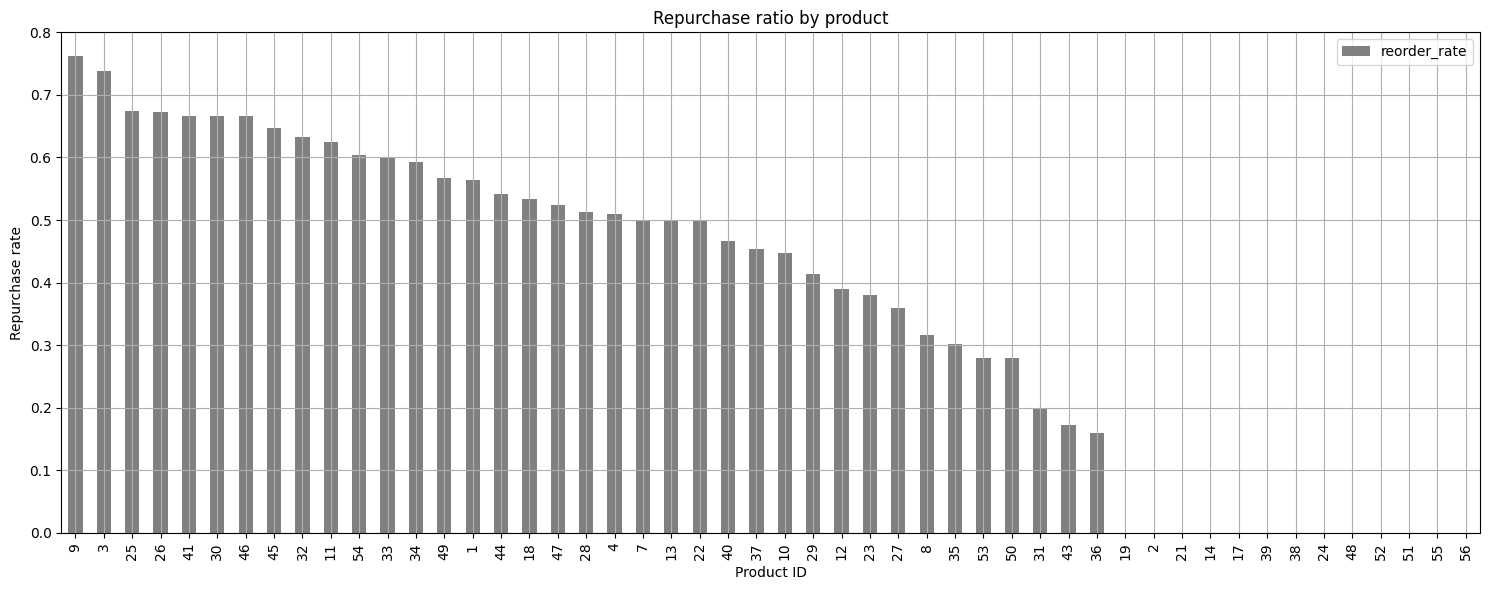

In [69]:
reorder_rate.head(50).sort_values(by='reorder_rate', ascending=False).plot(kind='bar', x='product_id', y='reorder_rate', figsize=(15,6), color='grey')
plt.title('Repurchase ratio by product')
plt.xlabel('Product ID')
plt.ylabel('Repurchase rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Write your conclusions here
###### LSPL

The ratio is the relationship between two quantities that shows how much a part represents in relation to the whole.
Therefore, to calculate the proportion of orders and reorders for each product, the ratio is given by repurchases/purchases. This gives us the repurchase ratio or rate.
To identify the product name and display it alongside the repurchase ratio, the [reorder_rate] DataFrame is merged with the [products] DataFrame, using the anchor column 'product_id'.

### [C4] For each customer, what proportion of your products had they already ordered?

In [70]:
# You have to put together order_products and instacart_orders to know who the user_id is

# Match products with orders to have user_id
df_order_products_users = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id')
display(df_order_products_users.sample(25).style.apply(zebra_rows, axis=1))
print()

# Total products ordered per user
total_user_orders = df_order_products_users.groupby('user_id').size()
print(total_user_orders.sample(25))
print()

# Total products reordered per user
total_user_reorders = df_order_products_users[df_order_products_users['reordered'] == 1].groupby('user_id').size()
print(total_user_reorders.sample(25))


,order_id,product_id,add_to_cart_order,reordered,user_id
2044401,346270,47209,1,1,32712
552888,1922465,34449,3,1,25992
2286425,2715387,9058,19,1,131946
3775915,417184,21560,2,0,205543
2138683,2276086,11497,9,1,144550
2585169,856437,6615,7,0,96359
4394948,3391155,17183,7,1,154372
2592011,955784,43928,17,0,155460
4004828,2520451,46667,2,1,171841
2285271,2849370,44359,64,1,133719



user_id
6865      11
46346      6
173989    24
152430     5
181862     6
85291     44
191645     8
83210     18
119634    12
153765    10
29976     31
153805    80
163570    26
61513     50
183249     5
43245     18
6583      74
86758     21
155061    77
122338     2
95512     57
135890    49
44005     16
21435      7
20297     19
dtype: int64

user_id
63683     22
48645     33
59852      9
16866     50
21750     13
166344    13
128203    21
100023     5
161826    17
28548      5
159836    36
127818     4
188628    20
110068    20
178518    16
168658     9
100441    11
106256     5
14262     16
116235    15
70477      7
24011      6
107757    45
90321      6
77719      4
dtype: int64


In [71]:
# Repetition rate per user
user_reorder_rate = (total_user_reorders / total_user_orders).fillna(0).reset_index()
user_reorder_rate.columns = ['user_id', 'user_reorder_rate']

print("Repetition rate per user: \n", user_reorder_rate.head(50).sort_values(by='user_reorder_rate', ascending=False))

Repetition rate per user: 
     user_id  user_reorder_rate
15       22        1.000000   
48       68        1.000000   
4         7        0.928571   
20       29        0.846154   
49       69        0.800000   
..      ...             ...   
3         6        0.000000   
21       30        0.000000   
24       34        0.000000   
38       57        0.000000   
46       66        0.000000   

[50 rows x 2 columns]


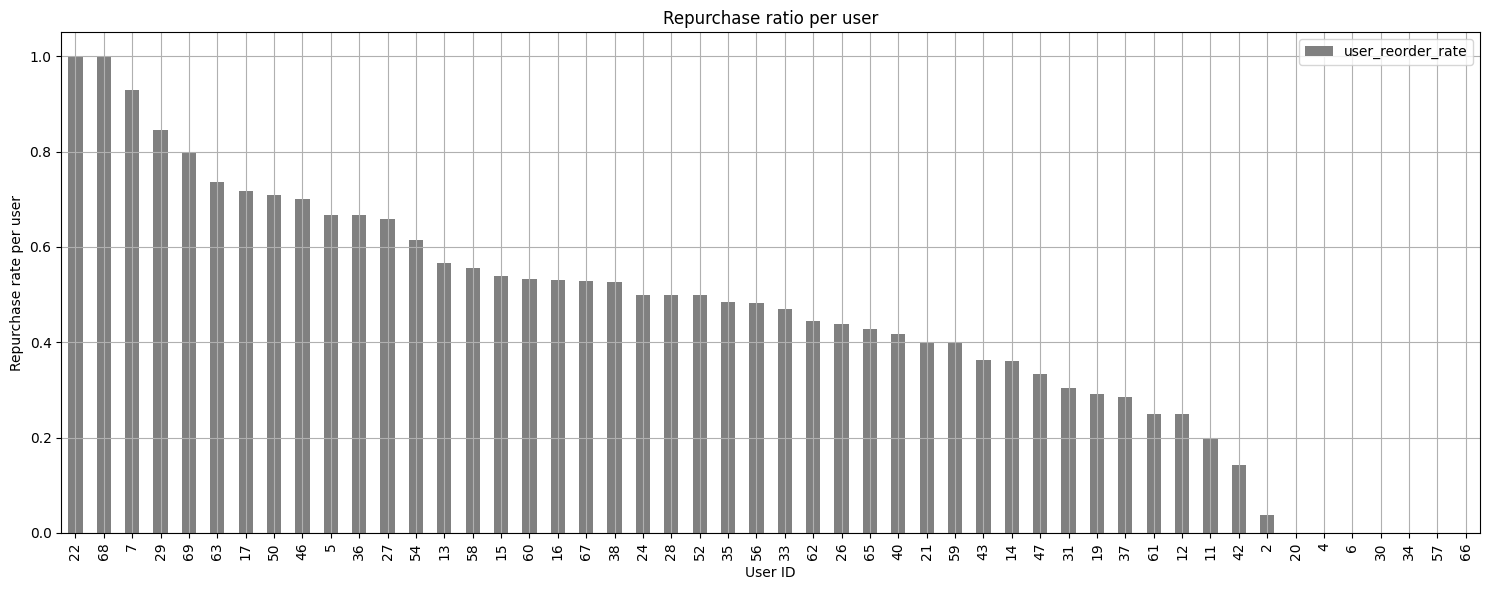

In [72]:
user_reorder_rate.head(50).sort_values(by='user_reorder_rate', ascending=False).plot(kind='bar', x='user_id', y='user_reorder_rate', figsize=(15,6), color='grey')
plt.title('Repurchase ratio per user')
plt.xlabel('User ID')
plt.ylabel('Repurchase rate per user')
plt.grid(True)
plt.tight_layout()
plt.show()

Write your conclusions here

###### LSPL

Pretty much the same considerations as [C3] were applied, but this time for the user.

### [C5] What are the top 20 items people put first in their carts?

In [73]:
# Filter the first products added
df_first_products = df_order_products[df_order_products['add_to_cart_order'] == 1]
display(df_first_products.head(25).style.apply(zebra_rows, axis=1))

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
33,2291457,27104,1,1
43,3075384,28799,1,1
45,1787676,47672,1,1
54,3266094,12763,1,1
56,1594605,34217,1,1


In [74]:
# Count the most added products first
top_20_first_added = df_first_products['product_id'].value_counts().head(20)
print("Quantity of most added products first: \n", top_20_first_added )

Quantity of most added products first: 
 product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: count, dtype: int64


In [75]:
# Cross IDs with names
top_20_first_added = top_20_first_added.to_frame(name='first_added_count').merge(df_products[['product_id', 'product_name']], 
                                                                                 left_index=True, right_on='product_id')

print(top_20_first_added[['product_id', 'product_name', 'first_added_count']])

       product_id    product_name  first_added_count
24851       24852          banana           15562   
13175       13176  bag_of_orga...           11026   
27844       27845  organic_who...            4363   
21136       21137  organic_str...            3946   
47208       47209  organic_has...            3390   
21902       21903  organic_bab...            3336   
47765       47766  organic_avo...            3044   
19659       19660    spring_water            2336   
16796       16797    strawberries            2308   
27965       27966  organic_ras...            2024   
44631       44632  sparkling_w...            1914   
49234       49235  organic_hal...            1797   
47625       47626     large_lemon            1737   
195           196            soda            1733   
38688       38689  organic_red...            1397   
26208       26209           limes            1370   
12340       12341   hass_avocados            1340   
5784         5785  organic_red...            1

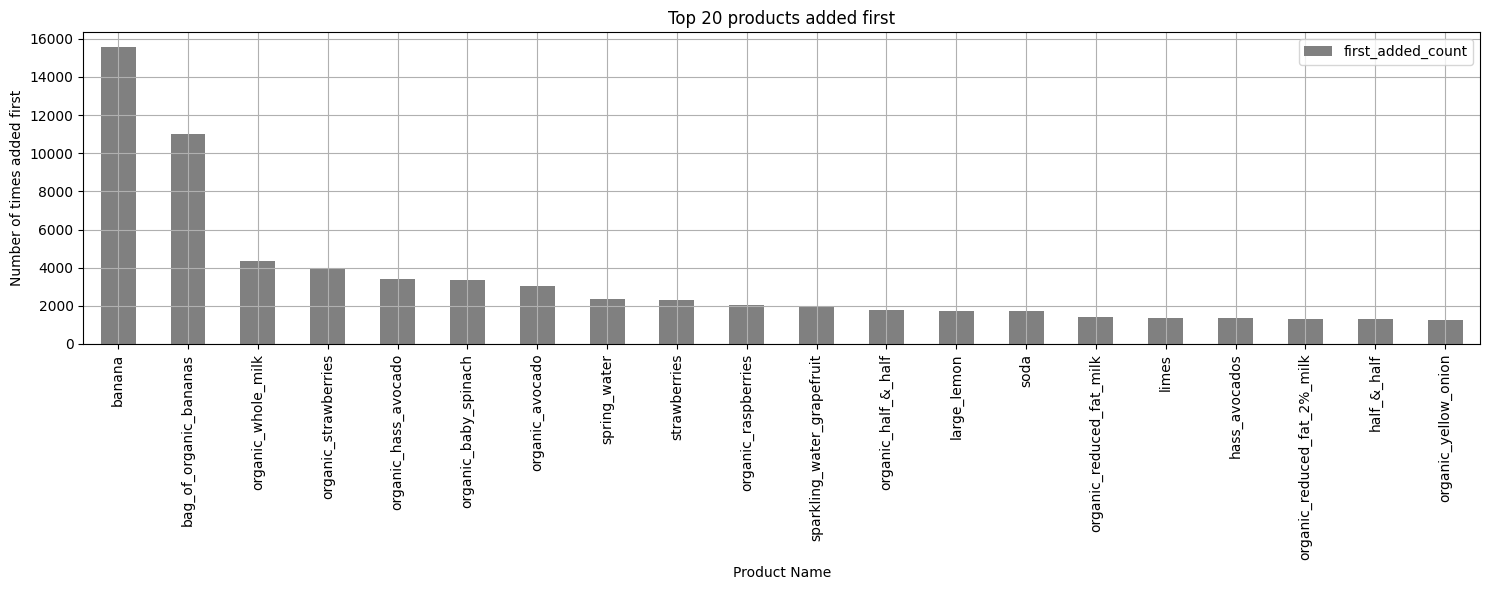

In [76]:
top_20_first_added[['product_id', 'product_name', 'first_added_count']].sort_values(by='first_added_count', ascending=False).plot(kind='bar', x='product_name', y='first_added_count', figsize=(15,6), color='grey')
plt.title('Top 20 products added first')
plt.xlabel('Product Name')
plt.ylabel('Number of times added first')
plt.grid(True)
plt.tight_layout()
plt.show()

Write your conclusions here
###### LSPL

The data indicates that certain products are added much more frequently as the first choice in the shopping cart, with bananas and bags of organic bananas particularly notable, leading by a wide margin.

Furthermore, there is a strong preference for organic and fresh products, which may reflect a more health-conscious consumer profile.

### Conclusion general del proyecto:

##### ✅ Observations

- Order analysis by hour and day of the week:

The analysis by hour of the day shows that orders are concentrated between 7:00 a.m. and 9:00 p.m., with a peak at 10:00 a.m.

By day of the week, users place more orders between Sunday and Monday, indicating a recurring pattern of weekly purchases at the beginning of the week.

The histogram of days between orders reveals that many people place orders every 1 to 7 days, reflecting frequent or weekly repurchase behavior.

- Distribution of the number of orders per customer:

Most customers placed only one order.

As the number of orders per user increases, the number of users decreases dramatically.

Exceptional cases of users with 25 to 28 orders (highly loyal customers) are undoubtedly a minority.

- Products added first to cart:

Products such as bananas, organic bananas, and organic whole milk are the most frequently added first to the cart.

A strong preference for fresh and organic products is evident.

This suggests health-driven consumption patterns or consistent habits.

- Items per order:

The average number of items per order is 10, with a maximum of 127 and a minimum of 1.

Most orders contain between 5 and 14 products, representing standard purchases.

- Most reordered products:

The product with the highest number of reorders is bananas, followed by multiple organic and fresh products such as strawberries, lemons, and avocados.

There is a clear repurchase pattern for basic and healthy items.

- Repurchase by product:

Products with the highest repurchase rate have more repeat orders.

- Most frequently added products at the top of the cart:

The items most frequently added to the cart first were identified.

Fresh products like bananas and organic milk appear to be purchase drivers.

- Reordering vs. Cart Position:

Products added first to the cart are more likely to be reordered, indicating their central value in the user's purchasing habits.

##### ✅ Conclusions

Purchasing behavior is clearly linked to daily and weekly routines: users shop primarily during daytime work hours and on weekends/early weeks.

The analysis suggests that the service is frequently used as part of a weekly replenishment routine.

Instacart has a user base with the following behavior: many shop once, few become repeat customers.

Products added first to the cart can act as purchase triggers for the remaining products.

Purchasing behavior is highly influenced by essential and fresh products, which tend to be reordered.

Repurchase frequency and order of addition provide signals about customer habits and product importance.


##### ✅ Recommendations

Take advantage of peak hours (7:00 a.m. to 10:00 a.m.) and high-demand days (Sundays and Mondays) for promotions or recommendations.

Consider automatic notifications or reminders 5 to 7 days after the last order to encourage repeat purchases.

Segment users based on their purchase frequency (every X days) to design loyalty plans or automate suggested shopping lists.

Implement early retention strategies: offers or coupons on the second or third order to increase repeat purchases.

Identify users with the potential to become loyal and apply personalized loyalty campaigns to them.

Prioritize the most commonly added items in the app/product to accelerate conversion.

Use these products as the basis for smart recommendations or initial bundles.

Experiment with marketing campaigns focused on "top-of-cart" products to increase engagement and average ticket sales.

Optimize the repurchase experience by highlighting products with high repeat orders in the interface (e.g., "your most ordered products").

Prioritize products that appear first in the cart as part of a suggested smart list for new orders.

Apply repurchase prediction models, considering both the order in which they were added to the cart and reorder history.

Offer selective discounts on products added to the top of the cart to increase the average receipt value.